<a href="https://colab.research.google.com/github/ghmash2/Thesis/blob/main/network_analysis_bitcoin_blockchain_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bq_helper
import networkx as nx

# import plotting library
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12.0, 8.0]

# display all outputs within each Juypter cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Create helper object for the  the bigQuery data set
blockchain_helper = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                            dataset_name="bitcoin_blockchain")
# inspect the structure
blockchain_helper.list_tables()
# look at a table of the information for both data sets



['blocks', 'transactions']

In [ ]:
blockchain_helper.head('transactions')

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1241693386000,b78dd4052c5c19ed15bff7f7cbc072cb87601680165412...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000006b6810ea2b71871065c31f0939c61bc73ca19e...,000000009f9639803e3a9424f210004c25c2c2e6a85836...,b78dd4052c5c19ed15bff7f7cbc072cb87601680165412...,3796474150,1,0,None
1,1261947871000,bfcb4467092290da3bee702d5ffedfe1933c36a18b0e77...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000003d0aa75d182618516bf64536d94119d23ef412...,00000000c1405320b87082391bd82155d88728dea85cd6...,bfcb4467092290da3bee702d5ffedfe1933c36a18b0e77...,296968200,1,0,None
2,1262072718000,a069017c031239357a6d325c7a10e6f4ed7cb722b1cb38...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",00000000b574d15c470a479874f19ea232b8b26e3ab742...,00000000adfab959a70c842627272d1ab2124d5ced5e2b...,a069017c031239357a6d325c7a10e6f4ed7cb722b1cb38...,132461744,1,0,None
3,1261474382000,9b9d3a70b70df897e2383fe16a09286502222f7ca06653...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000006224e9ce1dbe8a9b593d8f0485a19983b479bd...,00000000833508fb6be4b80e977e3eaa04994353b81cb3...,9b9d3a70b70df897e2383fe16a09286502222f7ca06653...,40052755,1,0,None
4,1277392209000,3fe2d7fa73e776f591e075783bc24cbd3e2fff8d444c72...,[{'input_script_bytes': b'\x04B1\r\x1c\x02\r\x...,"[{'output_satoshis': 5000000000, 'output_scrip...",0000000001ad7196de0396085a3fa95f2322722aa8b805...,000000000393cb2dc72fc296c66d9a19d2c01493e70c6d...,22d86d39b6d1226fbc372ce90f19e21c8b656ede4d8a8c...,90360458,1,0,None


In [ ]:
blockchain_helper.head('blocks')

,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,00000000000000000069564d0540f7d160fc7400e03c49...,0000000000000000005b63800e8bcad3720bbd0eb1de31...,edfc723aef8cb890ebfe5e344cb0396537b9eb16e303d9...,1515102747000,402690497,2223520064,536870912,82942944770,None,[{'transaction_id': '85980bce0852cd0c5486e74aa...,1
1,000000000000000000022ab0c5740584d31006ddcd1e20...,0000000000000000003fa343696761c709280e6c1960b6...,62eaf6717a4191717a73ec967c965567a644e64c6bfa6d...,1515688646000,402690497,2356290042,536870912,82942944770,None,[{'transaction_id': '1d305ff7f7a0a20b244cb297a...,1
2,000000000000000001628d23a7ba194fe9498676960947...,0000000000000000035278f6b3cdfd504dbc12ba6aa73a...,a0ab99611a82b0f2607e0f15bece5f27ee653c0e28512d...,1467313104000,402997206,1278950744,536870912,8996081931,None,[{'transaction_id': 'f3cde7dae624d6161b932431e...,1
3,00000000000000000025a758640f78eff1fe5bc472ff03...,0000000000000000000107f869d927913c9fe461221718...,2ee63d3176e5134fd4c4fb56455605caa0f4264695bbc3...,1530414240000,389508950,2427958816,536870912,218080250643,None,[{'transaction_id': '20475c1b5ac108d74970897d1...,1
4,0000000000000000004769939c52cfa8e8f1585b580080...,0000000000000000000e9767d1752bc44982204fd41f21...,c39b13747bc53ca09a0bb85282f8bfb085c91f10178b95...,1520194941000,392009692,719080265,536870912,129168124477,None,[{'transaction_id': '9f6dc05dc669a0a47d93f3b57...,1


In [ ]:
# lets parse the timestamp data into readable date times
query = """ WITH time AS
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    block_id
                FROM `bigquery-public-data.bitcoin_blockchain.blocks`
            )
            SELECT COUNT(block_id) AS blocks,
                EXTRACT(DATE FROM trans_time) AS date
            FROM time
            GROUP BY date
            ORDER BY date
        """
blockchain_helper.estimate_query_size(query)
q1_df = blockchain_helper.query_to_pandas(query)

Text(0.5,1,'Block Creation Volume Per Day')

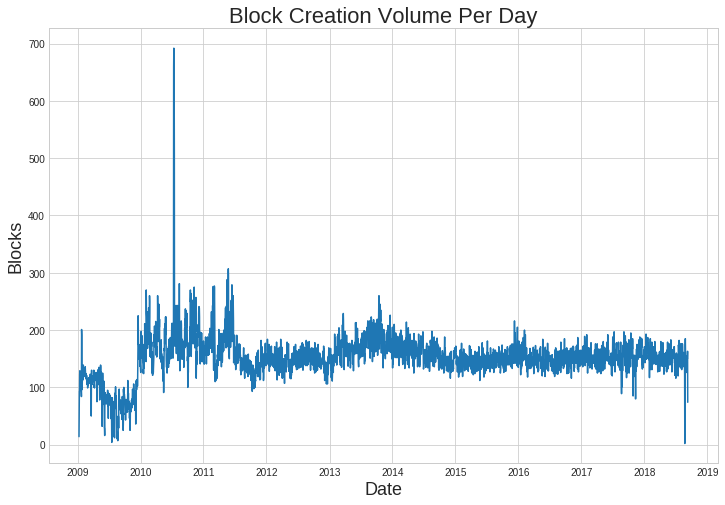

In [ ]:
plt.plot(q1_df['date'] ,q1_df['blocks'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Blocks', fontsize=18)
plt.title('Block Creation Volume Per Day', fontsize=22)

Text(0.5,0.98,'Blocks Created Per Day')

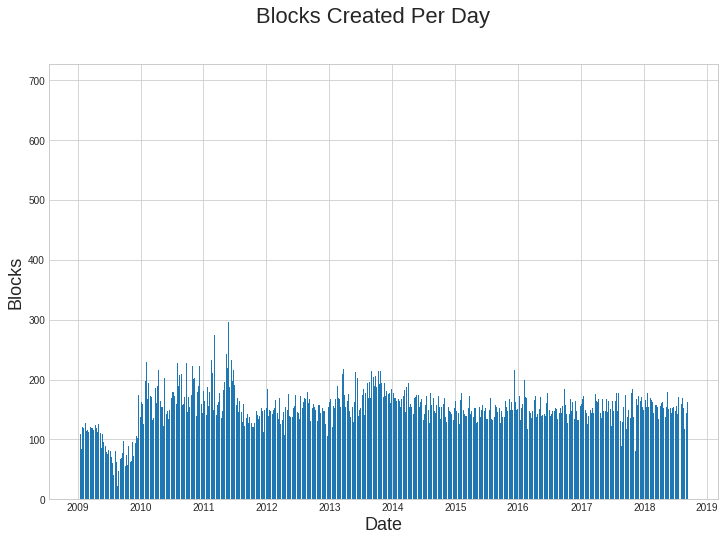

In [ ]:
plt.bar(q1_df['date'], q1_df['blocks'], align='edge')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Blocks', fontsize=18)
plt.suptitle('Blocks Created Per Day', fontsize=22)

In [ ]:
# when did this outlier occur?
# it looks like there was a large influx of users July 2010:
# https://en.bitcoin.it/wiki/2010#July
q1_df.sort_values('blocks', ascending=False).head(10)

,blocks,date
550,692,2010-07-13
549,659,2010-07-12
552,624,2010-07-15
551,578,2010-07-14
553,505,2010-07-16
866,307,2011-05-25
865,299,2011-05-24
867,296,2011-05-26
859,288,2011-05-18
864,286,2011-05-23


In [ ]:
# lets find which addresses has the most number of transactions
QUERY = """
    SELECT
        inputs.input_pubkey_base58 AS input_key, count(*)
    FROM `bigquery-public-data.bitcoin_blockchain.transactions`
    JOIN UNNEST (inputs) AS inputs
    WHERE inputs.input_pubkey_base58 IS NOT NULL
    GROUP BY inputs.input_pubkey_base58 order by count(*) desc limit 1000
    """
blockchain_helper.estimate_query_size(QUERY)
q2 = blockchain_helper.query_to_pandas(QUERY)
q2.head(n=10)

,input_key,f0_
0,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1899421
1,1dice8EMZmqKvrGE4Qc9bUFf9PX3xaYDp,1600304
2,1LuckyR1fFHEsXYyx5QK4UFzv3PEAepPMK,1204285
3,1dice97ECuByXAvqXpaYzSaQuPVvrtmz6,1105022
4,1P9RQEr2XeE3PEb44ZE35sfZRRW1JHU8qx,832779
5,1J37CY8hcdUXQ1KfBhMCsUVafa8XjDsdCn,751161
6,1dice9wcMu5hLF4g81u8nioL5mmSHTApw,595197
7,,540584
8,1DUb2YYbQA1jjaNYzVXLZ7ZioEhLXtbUru,540015
9,13vHWR3iLsHeYwT42RnuKYNBoVPrKKZgRv,505949


In [ ]:
# lets find which addresses has the most number of transactions
QUERY = """
    SELECT
        outputs.output_pubkey_base58 AS output_key, count(*)
    FROM `bigquery-public-data.bitcoin_blockchain.transactions`
    JOIN UNNEST (outputs) AS outputs
    WHERE outputs.output_pubkey_base58 IS NOT NULL
    GROUP BY outputs.output_pubkey_base58 order by count(*) desc limit 1000
    """
blockchain_helper.estimate_query_size(QUERY)
q2 = blockchain_helper.query_to_pandas(QUERY)
q2.head(n=50)

,output_key,f0_
0,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1899457
1,1dice8EMZmqKvrGE4Qc9bUFf9PX3xaYDp,1601175
2,1LuckyR1fFHEsXYyx5QK4UFzv3PEAepPMK,1204331
3,1dice97ECuByXAvqXpaYzSaQuPVvrtmz6,1105391
4,3CD1QW6fjgTwKq3Pj97nty28WZAVkziNom,1021573
5,1P9RQEr2XeE3PEb44ZE35sfZRRW1JHU8qx,832780
6,1J37CY8hcdUXQ1KfBhMCsUVafa8XjDsdCn,751958
7,1dice9wcMu5hLF4g81u8nioL5mmSHTApw,595852
8,1DUb2YYbQA1jjaNYzVXLZ7ZioEhLXtbUru,540102
9,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,532746


In [ ]:
# lets query all transactions this person was involved in
q_input = """
        WITH time AS
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    inputs.input_pubkey_base58 AS input_key,
                    outputs.output_pubkey_base58 AS output_key,
                    outputs.output_satoshis AS satoshis,
                    transaction_id AS trans_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
                    JOIN UNNEST (inputs) AS inputs
                    JOIN UNNEST (outputs) AS outputs
                WHERE inputs.input_pubkey_base58 = '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4'
                    OR outputs.output_pubkey_base58 = '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4'
            )
        SELECT input_key, output_key, satoshis, trans_id,
            EXTRACT(DATE FROM trans_time) AS date
        FROM time
        --ORDER BY date
        """
blockchain_helper.estimate_query_size(q_input)

85.4835140183568

In [ ]:
q3 = blockchain_helper.query_to_pandas(q_input)
q3.head(10)

# make a datatime type transformation
q3['date'] = pd.to_datetime(q3.date)
q3 = q3.sort_values('date')
# convert satoshis to bitcoin
q3['bitcoin'] = q3['satoshis'].apply(lambda x: float(x/100000000))
print(q3.info())

# make any sending of bitcoin a negative value representing 'leaving' this wallet
q3['bitcoin_mod'] = q3['bitcoin']
q3.loc[q3['input_key'] == '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4', 'bitcoin_mod'] = -q3['bitcoin_mod']
# sanity check...
q3.loc[q3['input_key'] == '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704205 entries, 3740108 to 5679393
Data columns (total 6 columns):
input_key     object
output_key    object
satoshis      int64
trans_id      object
date          datetime64[ns]
bitcoin       float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 304.6+ MB
None


,input_key,output_key,satoshis,trans_id,date,bitcoin,bitcoin_mod
5002374,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,554338291,be0325af8c2b514205280cf61dfb151a4b1646b1d6ac64...,2014-03-12,5.543383,-5.543383
5002373,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,14nkqPAJ1szpMhv1g7FLXYorCBvY5tb25c,1000000000,be0325af8c2b514205280cf61dfb151a4b1646b1d6ac64...,2014-03-12,10.000000,-10.000000
294111,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1N1Z9NvfzWgFBtUdwQvtD8keZULYv4ZZhT,230000,70b9465b2cc75a309bebce90a3e33e4079fe7945849241...,2014-03-12,0.002300,-0.002300
294110,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,960000,70b9465b2cc75a309bebce90a3e33e4079fe7945849241...,2014-03-12,0.009600,-0.009600
4647630,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,52216817,7b00dc090600ea816136a3432ee298aea97224c696fd23...,2014-03-12,0.522168,-0.522168


In [ ]:
q3.info()
# how many unique addresses are included in this wallets transaction history?
q3['output_key'].nunique()
# how many transactions to the top 10 addresses?
# extreme value for the top address...
q3['output_key'].value_counts().nlargest(10)
# fold difference between the largest and second largest wallet transactions - 44X!
# what is the story behind this wallet...?
q3['output_key'].value_counts().nlargest(5).iloc[0] / q3['output_key'].value_counts().nlargest(5).iloc[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704205 entries, 3740108 to 5679393
Data columns (total 7 columns):
input_key      object
output_key     object
satoshis       int64
trans_id       object
date           datetime64[ns]
bitcoin        float64
bitcoin_mod    float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 508.2+ MB


89.77993817692725

In [ ]:
# how many unique addresses are included in this wallets transaction history?
q3['input_key'].nunique()
# how many transactions to the top 10 addresses?
# extreme value for the top address...
q3['input_key'].value_counts().nlargest(10)
# fold difference between the largest and second largest wallet transactions - 44X!
# what is the story behind this wallet...?
q3['input_key'].value_counts().nlargest(5).iloc[0] / q3['input_key'].value_counts().nlargest(5).iloc[1]

3.3662365008215156

Text(0.5,0.98,'Volume of Transactions Per Day')

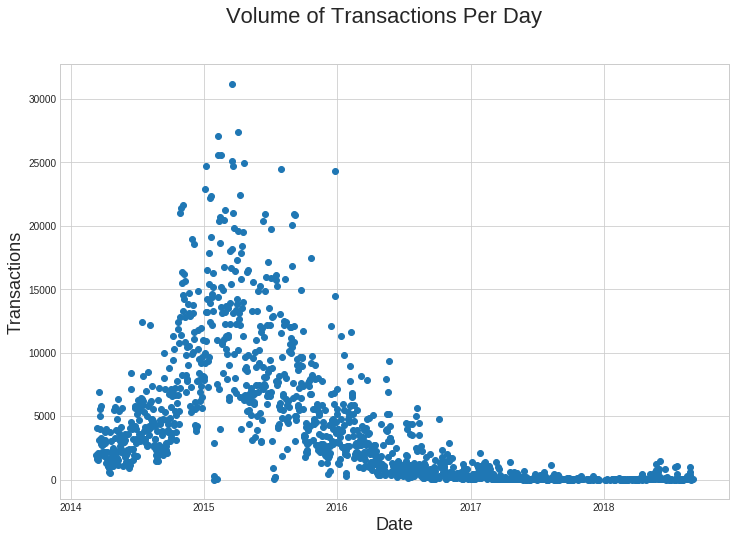

In [ ]:
# we should look at transaction activity across time
q3_plot = q3['date'].value_counts()
q3_plot.head()
# plotting params
ax = plt.gca()
ax.scatter(q3_plot.index, q3_plot.values)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Transactions', fontsize=18)
plt.suptitle('Volume of Transactions Per Day', fontsize=22)
#ax.set_yscale('log')

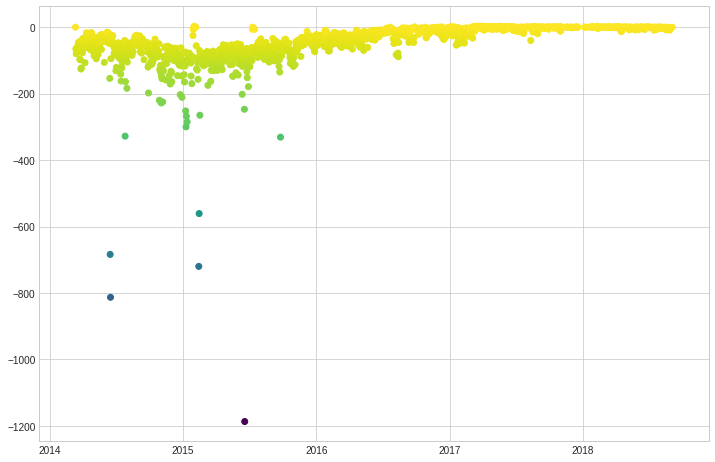

In [ ]:
# daily difference in input transactions and output transactions
daily_diff = q3.groupby(['date'])['input_key', 'output_key'].nunique()
daily_diff['difference'] = daily_diff.input_key - daily_diff.output_key
plt.scatter(daily_diff.index, daily_diff.difference, c=daily_diff.difference, cmap='viridis')

In [ ]:
# percentage of unique transactions out of total - the rest must be transactions to multiple addresses (don't really understand this...)
q3['trans_id'].nunique() / len(q3)
# there are multiple records of the same input to outout address recoreded with the same transaction ID
# why does this happen? is the total transferred bitcoin for a transaction being split up across several records?
len(q3.groupby(['trans_id', 'output_key']).nunique()) / len(q3)

0.44261382611599687

In [ ]:
# lets group each individual transaction and the total amount of bitcoin sent / received and plot over time
trans_plot = q3.groupby(['date', 'trans_id'])['bitcoin'].sum()
trans_plot.head(10)

date        trans_id                                                        
2014-03-12  0016b4489aaa4e5f4b0446c169e6024830bebcf6978109a4a4e35ee4242c1d22     0.01
            008262f933de4f06aa1a1bdc550301d09f57a60fbd09e568f5e6d56df3813dd3     0.01
            00c9fc726f9cfd554cc3ee7a6d01d6d92bf979047e0fcaf8cb193e14de489a3a     0.10
            0151471974fae7941449bff428a4d1b4a5b582f03e57dd33d748aecf9f73920f    31.50
            04370e098f6d8060f9e23343b4dfb59ffa9233d74bfde59074b46c8faa6d5878     0.01
            054f1db3877b328881e222f9087660d7963ba50fc5842119e2d04565fa0c34be     0.01
            07b17aa462590dec508b09b2d62319ee9568907b8a148c1bd7639ad14330cb40     0.01
            08711d53afe2c5ba8f9ad77d4c1e6092c9bbee701cd66d3cb6f4eaf97ebf93b2     0.01
            094df37feb87e3913b3d2362450bea714d4c7ede38d6fa67a217bcfa5f570dd6    89.50
            09552afaf063204cd268188bc29e0ed80bb2f6577a26ae2c3ae6a74e6c1ebb76     0.01
Name: bitcoin, dtype: float64

Text(0.5,0.98,'Net Bitcoin Transacted Per Day')

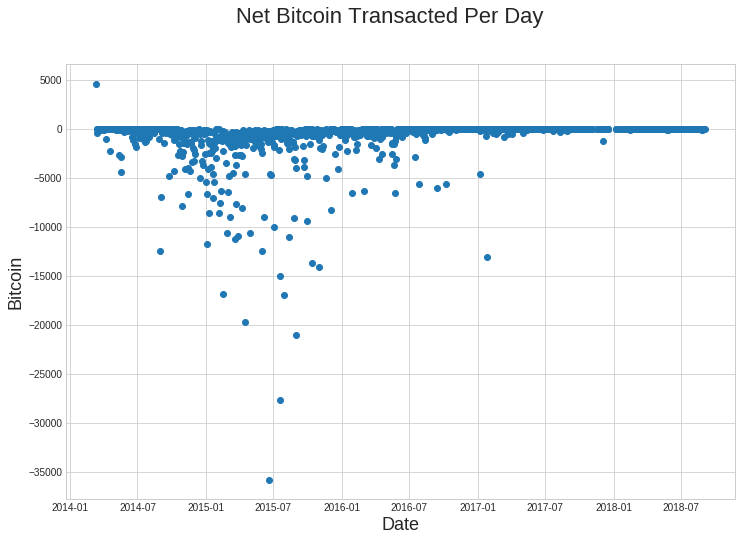

In [ ]:
# lets plot the value of transactions over time from this wallet
q4_plot = q3.groupby('date', as_index=False)[['bitcoin_mod']].sum()
plt.plot_date(q4_plot['date'], q4_plot['bitcoin_mod'])
plt.ylabel('Bitcoin', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.suptitle('Net Bitcoin Transacted Per Day', fontsize=22)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Net Bitcoin Transacted per Month')

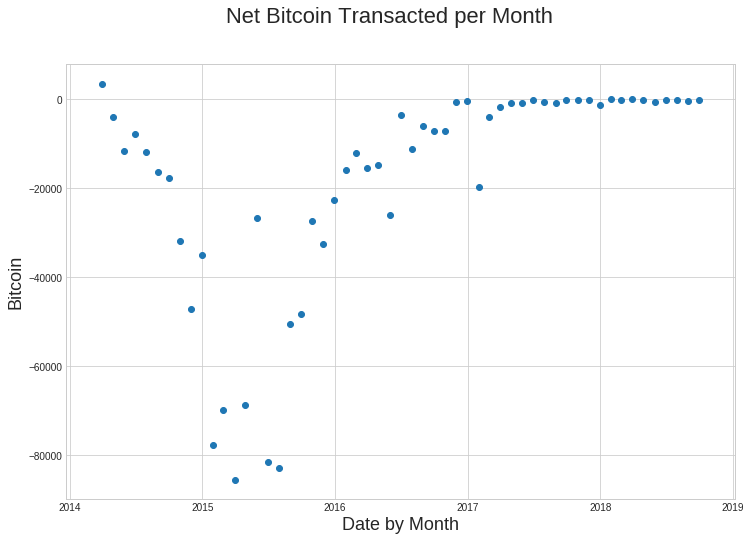

In [ ]:
# lets get the total amount of bitcoin this wallet sent out each month
value_plot = q3.groupby([q3['date'].dt.month]).sum().reset_index()
value_plot = q3.set_index(pd.DatetimeIndex(q3['date'])).groupby(pd.TimeGrouper('M'))[['bitcoin_mod']].sum()
value_plot.head()
plt.scatter(value_plot.index, value_plot.values)
plt.xlabel('Date by Month', fontsize=18)
plt.ylabel('Bitcoin', fontsize=18)
plt.suptitle('Net Bitcoin Transacted per Month', fontsize=22)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Monthly Transaction Volume & Net Bitcoin Exchange')

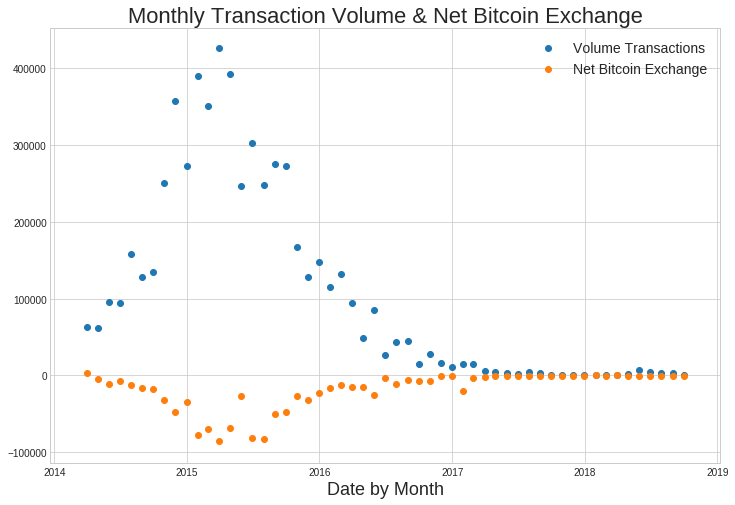

In [ ]:
# lets get the total amount of transactions this wallet made each month
corr_plot = q3.groupby([q3['date'].dt.month]).sum().reset_index()
corr_plot = q3.set_index(pd.DatetimeIndex(q3['date'])).groupby(pd.TimeGrouper('M'))[['trans_id']].count()
corr_plot = corr_plot.join(value_plot)
corr_plot.head()
plt.scatter(corr_plot.index, corr_plot['trans_id'])
plt.scatter(corr_plot.index, corr_plot['bitcoin_mod'])
plt.legend(fontsize=14, labels=('Volume Transactions', 'Net Bitcoin Exchange'))
plt.xlabel('Date by Month', fontsize=18)
#plt.ylabel('Transactions', fontsize=18)
plt.title('Monthly Transaction Volume & Net Bitcoin Exchange', fontsize=22)

In [ ]:
# look at a correlation matrix between transactions in a given month
# and net bitcoins transacted in a given month
fin_corr = pd.concat([value_plot, corr_plot], axis = 1)
fin_corr.corr()


,bitcoin_mod,trans_id,bitcoin_mod
bitcoin_mod,1.000000,-0.924719,1.000000
trans_id,-0.924719,1.000000,-0.924719
bitcoin_mod,1.000000,-0.924719,1.000000


Text(0.5,1,'Net Volume Bitcoins Exchanged')

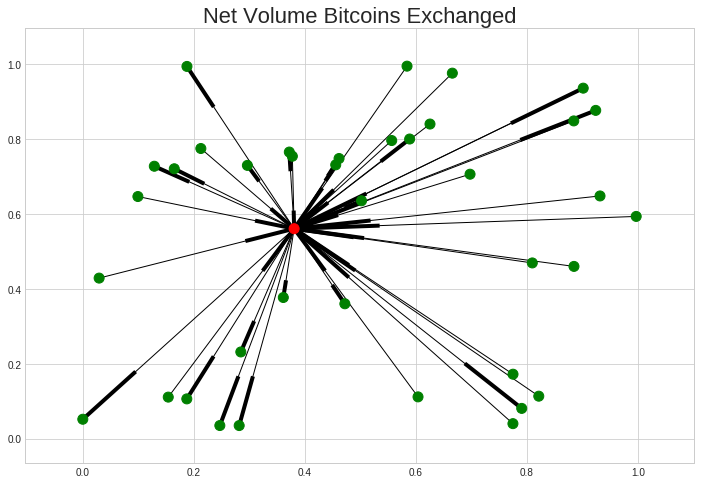

In [ ]:
# top 20 wallets bitcoins sent out to
nx_plot_asc = q3.groupby(['input_key', 'output_key'], as_index=False)['bitcoin_mod'].sum().sort_values(by='bitcoin_mod', ascending=True)[0:20]
# top 20 wallets bitcoins received from
nx_plot_desc = q3.groupby(['input_key', 'output_key'], as_index=False)['bitcoin_mod'].sum().sort_values(by='bitcoin_mod', ascending=False)[0:20]
nx_plot = pd.concat([nx_plot_asc, nx_plot_desc], ignore_index=True)

# networkx graph of net volumne of bitcoins transacted (most into and most out of the wallet in question)
G = nx.from_pandas_edgelist(nx_plot, 'input_key', 'output_key', 'bitcoin_mod', nx.DiGraph())
# specify node color
color_list = []
for node in G.nodes():
    if node == '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4':
        color_list.append('red')
    else:
        color_list.append('green')
# plot
pos=nx.random_layout(G)
nx.draw_networkx_nodes(G,pos, node_list= G.nodes(),node_color=color_list,node_size=100)
nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Net Volume Bitcoins Exchanged', fontsize=22)

In [ ]:
nx_plot_asc[0:5]

,input_key,output_key,bitcoin_mod
20967,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,-176879.143975
40016,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,3QHYuqj9EZ9FzVwpEagQwo2SQG7MhHGrw9,-91483.000000
35980,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,-49585.286420
16193,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1BT4DYrt3ZoSz6WeGEZzrj4tdidUcpCfQ6,-26615.034974
26932,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1HdCtn5aiySHpyrRs5FSiS1NPSm9BPnEeR,-18917.237584


In [ ]:
# we can query for the top x wallets that transact with our wallet of interest
# from nx_plot_asc[0:10]
# leave out the original wallet
# where do top outputs send their bitcoin?
top_out =  """
       WITH time AS
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    inputs.input_pubkey_base58 AS input_key,
                    outputs.output_pubkey_base58 AS output_key,
                    outputs.output_satoshis AS satoshis,
                    transaction_id AS trans_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
                    JOIN UNNEST (inputs) AS inputs
                    JOIN UNNEST (outputs) AS outputs
                WHERE inputs.input_pubkey_base58 = '1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X'
                    OR outputs.output_pubkey_base58 = '1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X'
                    OR inputs.input_pubkey_base58 = '3QHYuqj9EZ9FzVwpEagQwo2SQG7MhHGrw9'
                    OR outputs.output_pubkey_base58 = '3QHYuqj9EZ9FzVwpEagQwo2SQG7MhHGrw9'
                    OR inputs.input_pubkey_base58 = '1BT4DYrt3ZoSz6WeGEZzrj4tdidUcpCfQ6'
                    OR outputs.output_pubkey_base58 = '1BT4DYrt3ZoSz6WeGEZzrj4tdidUcpCfQ6'
                    OR inputs.input_pubkey_base58 = '1HdCtn5aiySHpyrRs5FSiS1NPSm9BPnEeR'
                    OR outputs.output_pubkey_base58 = '1HdCtn5aiySHpyrRs5FSiS1NPSm9BPnEeR'
                    OR inputs.input_pubkey_base58 = '1LyJffQE3iCzRdv1Fqv7Y5wawr7u6aajw8'
                    OR outputs.output_pubkey_base58 = '1LyJffQE3iCzRdv1Fqv7Y5wawr7u6aajw8'
            )
        SELECT input_key, output_key, satoshis, trans_id,
            EXTRACT(DATE FROM trans_time) AS date
        FROM time
        --ORDER BY date
        """
blockchain_helper.estimate_query_size(top_out)

85.4835140183568

In [ ]:
# top nodes currency sent to
top_out_df = blockchain_helper.query_to_pandas(top_out)
top_out_df.head(10)

# make a datatime type transformation
top_out_df['date'] = pd.to_datetime(top_out_df.date)
top_out_df = top_out_df.sort_values('date')
# convert satoshis to bitcoin
top_out_df['bitcoin'] = top_out_df['satoshis'].apply(lambda x: float(x/100000000))

# make any sending of bitcoin a negative value representing 'leaving' this wallet
top_out_df['bitcoin_mod'] = top_out_df['bitcoin']

top_out_df.loc[(top_out_df['input_key'] == '1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X')
               | (top_out_df['input_key'] == '3QHYuqj9EZ9FzVwpEagQwo2SQG7MhHGrw9')
               | (top_out_df['input_key'] == '1BT4DYrt3ZoSz6WeGEZzrj4tdidUcpCfQ6')
               | (top_out_df['input_key'] == '1HdCtn5aiySHpyrRs5FSiS1NPSm9BPnEeR')
               | (top_out_df['input_key'] == '1LyJffQE3iCzRdv1Fqv7Y5wawr7u6aajw8'), 'bitcoin_mod'] = -top_out_df['bitcoin_mod']

# sanity check...
top_out_df.loc[top_out_df['input_key'] == '1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X'].head()
top_out_df.loc[top_out_df['output_key'] == '1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X'].head()

,input_key,output_key,satoshis,trans_id,date,bitcoin,bitcoin_mod
17674,19nmKT8EKFZ3XpPYRyo6ucUuJpzYnu6Tkg,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,1000000000,f70b8c047c2d63657bbc64e8a54a3b25bd8936781e5c58...,2014-08-05,10.0,10.0
17675,18wH3ausL34svKuBX4mSX988azbYemsdNy,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,1000000000,f70b8c047c2d63657bbc64e8a54a3b25bd8936781e5c58...,2014-08-05,10.0,10.0
113967,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,100000000,9318ce76ac7736178a281bc427503e28d13a700766148d...,2014-08-07,1.0,1.0
114048,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,100000000,9318ce76ac7736178a281bc427503e28d13a700766148d...,2014-08-07,1.0,1.0
113970,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,100000000,9318ce76ac7736178a281bc427503e28d13a700766148d...,2014-08-07,1.0,1.0


Text(0.5,1,'of the top 5 wallets to receive funds from 1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4')

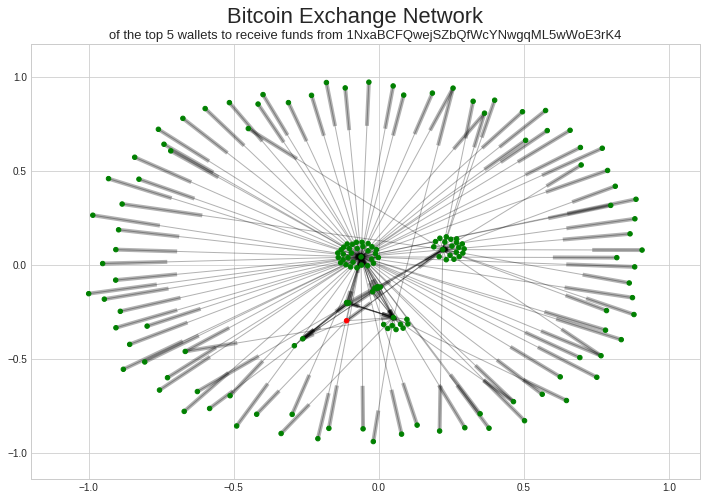

In [ ]:
# visualize network of transaction volume out of our wallet in question
nx_plot = pd.Series.to_frame(top_out_df.groupby(['input_key', 'output_key'], as_index=True)['bitcoin_mod'].nunique().sort_values(ascending=False)).reset_index(['input_key','output_key'])
# create graph
G = nx.from_pandas_edgelist(nx_plot[0:200], 'input_key', 'output_key', 'bitcoin_mod', nx.MultiDiGraph())
# specify node color
color_list = []
for node in G.nodes():
    if node == '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4':
        color_list.append('red')
    else:
        color_list.append('green')
# draw graph
pos = nx.spring_layout(G)
#plt.figure(3,figsize=(16,12))
nx.draw_networkx_nodes(G,pos,node_color=color_list,node_size=20)
#nx.draw_networkx_labels(G, pos, font_size=4)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.suptitle('Bitcoin Exchange Network', fontsize=22, y=0.945)
plt.title('of the top 5 wallets to receive funds from 1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4', fontsize=13)

In [ ]:
# compute degree centrality
pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').sort_values(by = [0], ascending=False)[0:10]

,0
1BT4DYrt3ZoSz6WeGEZzrj4tdidUcpCfQ6,0.75625
1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,0.25000
1LyJffQE3iCzRdv1Fqv7Y5wawr7u6aajw8,0.18750
1HdCtn5aiySHpyrRs5FSiS1NPSm9BPnEeR,0.07500
1LuckyR1fFHEsXYyx5QK4UFzv3PEAepPMK,0.05000
1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,0.03750
1LuckyY9fRzcJre7aou7ZhWVXktxjjBb9S,0.03750
1LuckyP83urTUEJE9YEaVG2ov3EDz3TgQw,0.03750
1LuckyG4tMMZf64j6ea7JhCz7sDpk6vdcS,0.02500
1LuckyB5VGzdZLZSBZvw8DR17iiFCpST7L,0.02500


In [ ]:
in_cent = pd.DataFrame.from_dict(nx.in_degree_centrality(G), orient='index').sort_values(by = [0], ascending=False)[0:10]

In [ ]:
out_cent = pd.DataFrame.from_dict(nx.out_degree_centrality(G), orient='index').sort_values(by = [0], ascending=False)[0:10]

In [ ]:
bw_cent = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').sort_values(by = [0], ascending=False)[0:10]

Text(0.35,1.04,'Node Centrality Metrics')

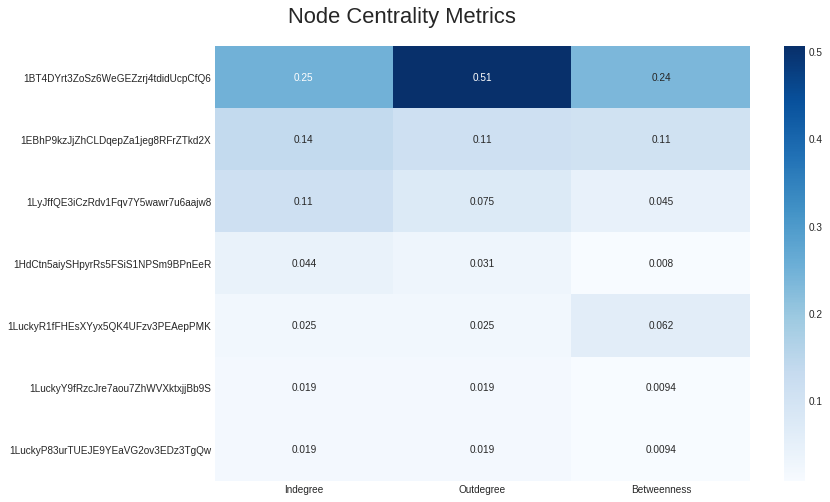

In [ ]:
cent = pd.merge(in_cent, out_cent, left_index=True, right_index=True)
cent = pd.merge(cent, bw_cent, left_index=True, right_index=True)
cent.columns = ['Indegree', 'Outdegree', 'Betweenness']
import seaborn as sns
sns.heatmap(cent, cmap='Blues', annot=True)
plt.title('Node Centrality Metrics', fontsize=22, y=1.04, x=.35)

In [ ]:
nx_plot_desc[0:5]

,input_key,output_key,bitcoin_mod
163,1LuckyR1fFHEsXYyx5QK4UFzv3PEAepPMK,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,28902.914182
161,1LuckyG4tMMZf64j6ea7JhCz7sDpk6vdcS,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,13074.470789
164,1LuckyY9fRzcJre7aou7ZhWVXktxjjBb9S,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,11952.357973
106,1EBhP9kzJjZhCLDqepZa1jeg8RFrZTkd2X,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,9312.770751
162,1LuckyP83urTUEJE9YEaVG2ov3EDz3TgQw,1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4,6884.173651
